In [1]:
# Import DAS-N2N model class (torch version)
from dasn2n import DASN2N

# Import packages for reading, holding and plotting data
import numpy as np
import matplotlib.pyplot as plt
import obspy.core as oc

## Running DAS-N2N model

In [2]:
# Load DAS-N2N model and load pre-trained weights from paper
model = DASN2N()
model.load_weights()

In [3]:
# Read example data from GitHub (stored as mseed for convenience):
das_data_mseed = oc.read("./data/BPT1_UTC_20200117_013019.232.mseed") # Read with obspy

# Create 2D numpy array with DAS data
das_data_numpy = np.zeros((len(das_data_mseed[0].data), len(das_data_mseed))) # (Time samples, DAS channels)
n = 0
for das_channel in das_data_mseed:
    das_data_numpy[:,n] = das_channel.data
    n += 1

In [4]:
das_data_numpy

array([[-464., -408., -299., ...,   41.,   35.,   27.],
       [ 113.,  102.,   46., ...,  -64.,  -36.,  -28.],
       [-115., -118., -121., ...,   16.,  -24.,   -5.],
       ...,
       [-479., -314., -179., ...,   35.,   44.,   12.],
       [ 397.,  301.,  241., ...,  -33.,  -55.,  -18.],
       [ 200.,  165.,  126., ...,  -46.,  -72.,  -62.]])

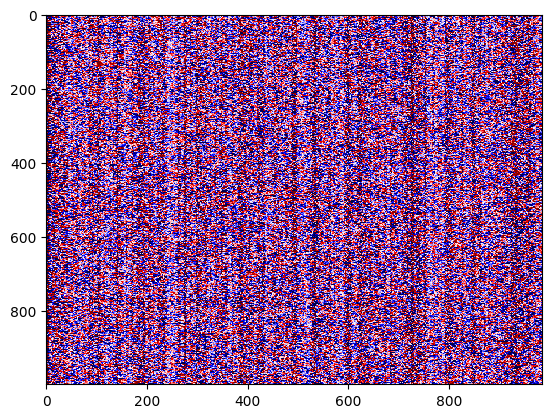

In [5]:
# Plot raw data (interpolation='none' important to show true noise levels)
plt.imshow(das_data_numpy[:1000,:], interpolation='none', cmap="seismic", vmin=-50, vmax=50, aspect="auto")
plt.show()

In [6]:
# Denoise, as per paper:
denoised_das_data = model.denoise_numpy(das_data_numpy)

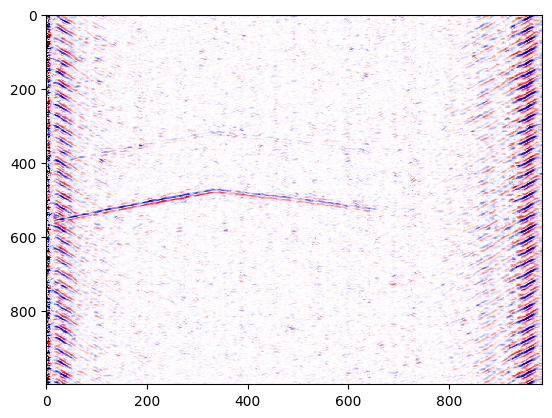

In [7]:
# Plot denoised data
plt.imshow(denoised_das_data[:1000,:], interpolation="none", cmap="seismic", vmin=-50, vmax=50, aspect="auto")
plt.show()

In [8]:
# Denoise but normalise along each DAS channel, rather than across all channels and time points 
# (now recommended to handle sections with relatively high noise channels - e.g., ends of cables, hanging sections)
denoised_das_data = model.denoise_numpy(das_data_numpy, remove_mean_axis = 0, std_norm_axis = 0)

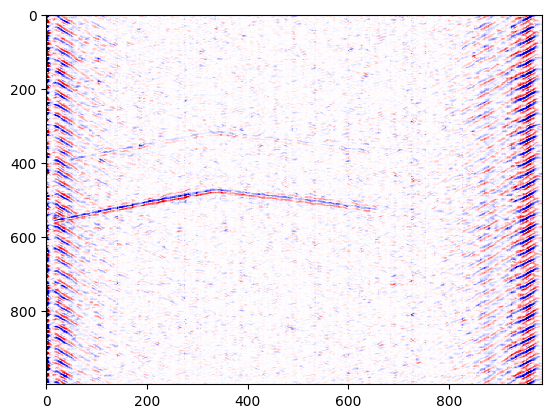

In [9]:
# Plot denoised data
plt.imshow(denoised_das_data[:1000,:], interpolation='none', cmap="seismic", vmin=-50, vmax=50, aspect="auto")
plt.show()